In [12]:
from pathlib import Path
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [8]:
dataset = 'demo/'
model_path = Path("/home/v-mezhang/blob/model/" + str(dataset))

In [9]:
with open(os.path.join(model_path, "rewards.pkl"), "rb") as f:
    rewards = pickle.load(f)
with open(os.path.join(model_path, "opt_rewards.pkl"), "rb") as f:
    opt_rewards = pickle.load(f)

In [13]:
num_exper, num_sam = rewards.shape
cumu_regrets = np.zeros((num_exper, num_sam))
for i in range(num_exper):
    cumu_reward = 0
    cumu_opt_reward = 0

    for j in range(num_sam):
        cumu_reward += rewards[i,j]
        cumu_opt_reward += opt_rewards[i,j]
        cumu_regrets[i,j] = (cumu_opt_reward - cumu_reward)/(j+1)

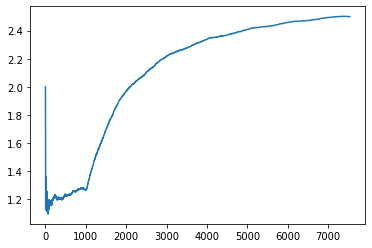

In [14]:
plt.plot(range(num_sam), cumu_regrets.mean(axis=0))

(array([2.391e+03, 1.857e+03, 1.366e+03, 8.040e+02, 0.000e+00, 6.140e+02,
        3.180e+02, 1.470e+02, 4.000e+01, 1.000e+00]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

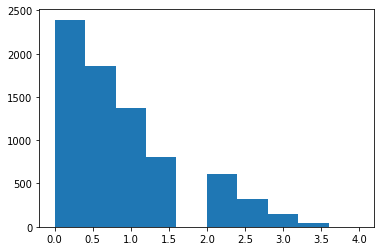

In [16]:
plt.hist(rewards.mean(axis = 0))

(array([  38.,  111.,  264.,  369.,    0.,  442.,  664.,  650.,  818.,
        4182.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

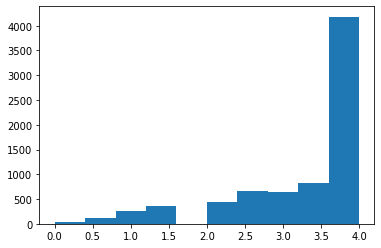

In [17]:
plt.hist(opt_rewards.mean(axis = 0))